In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Sinusoidal gratings

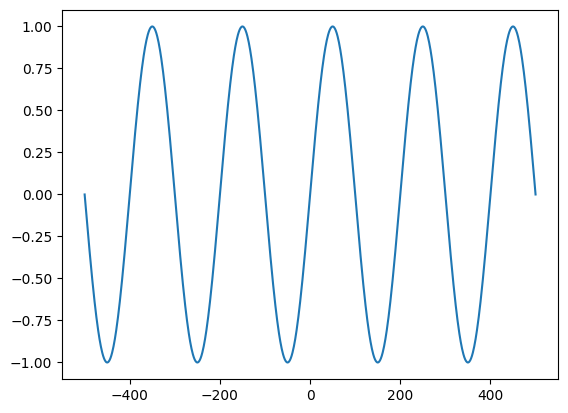

In [5]:
x = np.arange(-500, 501, 1)

wavelength = 200
y = np.sin(2 * np.pi * x / wavelength)

plt.plot(x, y)
plt.show()

2D Plot

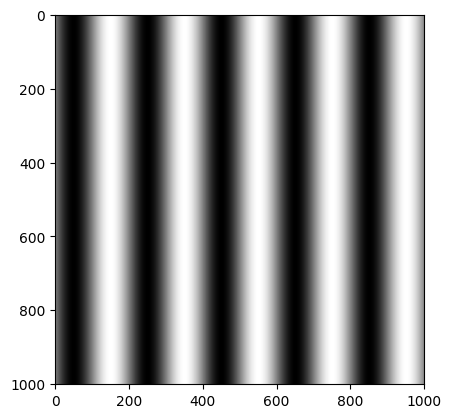

In [8]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)


plt.imshow(grating, cmap="gray")
plt.show()


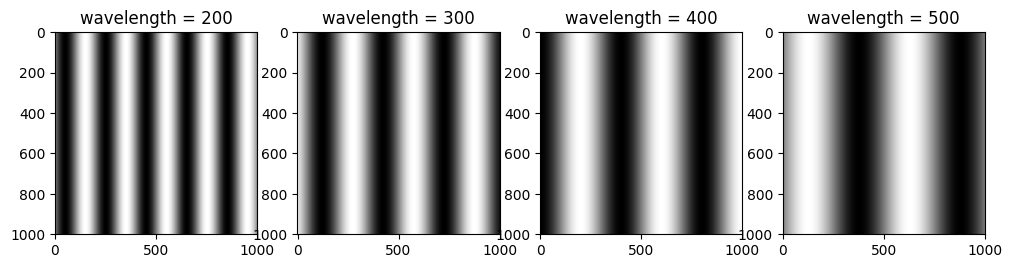

In [14]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
wavelength = 200
for i in range(len(ax)):
    grating = np.sin(2 * np.pi * X / wavelength)
    ax[i].imshow(grating, cmap="gray")
    ax[i].set_title(f"wavelength = {wavelength}")
    wavelength += 100
plt.show()

Change the orientation of the wave

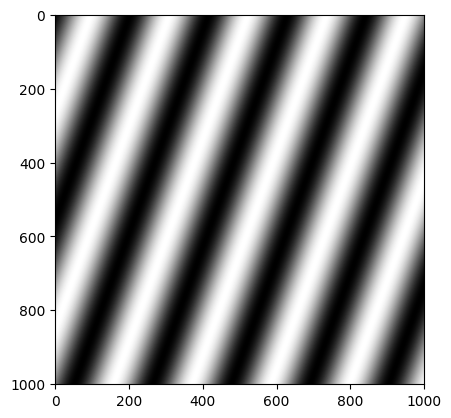

In [15]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200

angle = np.pi / 9
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.imshow(grating, cmap="gray")
plt.show()

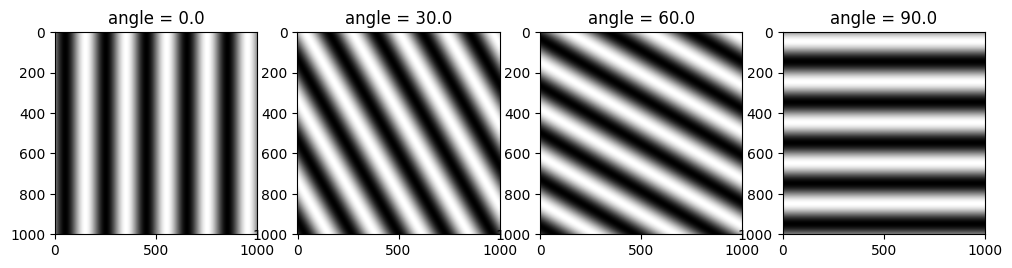

In [18]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
wavelength = 200
angle = 0
for i in range(len(ax)):
    grating = np.sin(2 * np.pi * (X*np.cos(angle)-Y*np.sin(angle)) / wavelength)
    ax[i].imshow(grating, cmap="gray")
    ax[i].set_title(f"angle = {round(angle * 180 / np.pi, 0)}")
    angle += np.pi/6
plt.show()

Fourier Transform

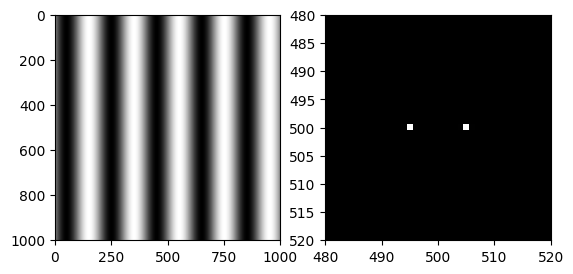

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 0
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.subplot(121)
plt.imshow(grating, cmap="gray");

ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft), cmap="gray");
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

Let’s see what happens if you double the frequency of the sinusoidal grating. To double the frequency, you half the wavelength:

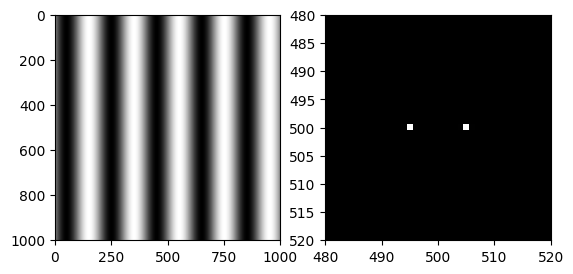

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 0
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.subplot(121)
plt.imshow(grating, cmap="gray");

ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft), cmap="gray");
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

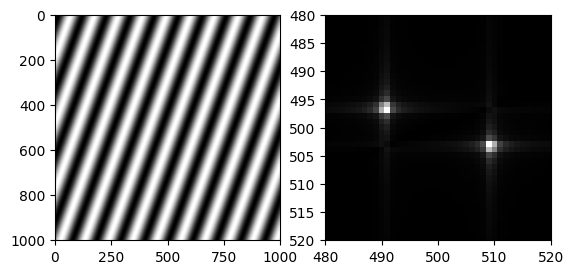

In [43]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9

grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.subplot(121)
plt.imshow(grating, cmap="gray")

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft), cmap="gray")
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y

plt.show()

Adding More Than One Grating

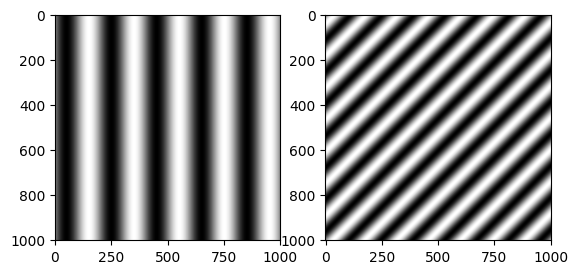

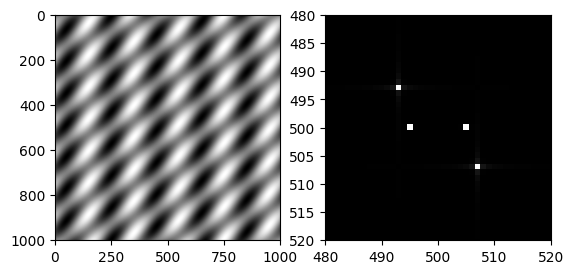

In [46]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

wavelength_1 = 200
angle_1 = 0

grating_1 = np.sin(2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1)

wavelength_2 = 100
angle_2 = np.pi/4

grating_2 = np.sin(2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2)

plt.subplot(121)
plt.imshow(grating_1, cmap="gray")

plt.subplot(122)
plt.imshow(grating_2, cmap="gray")
plt.show()

gratings = grating_1 + grating_2
# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings, cmap="gray")
plt.subplot(122)
plt.imshow(abs(ft), cmap="gray")
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

Adding more sinusoidal gratings

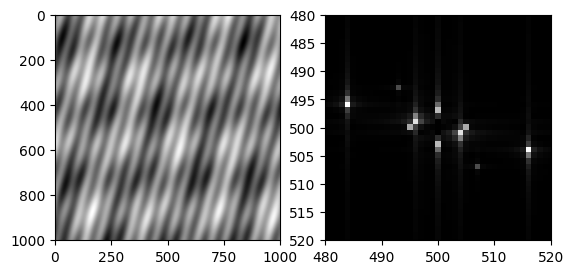

In [47]:
# gratings.py
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi/4, np.pi/9, np.pi/2, np.pi/12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len)
    
# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(121)
plt.imshow(gratings, cmap="gray")

plt.subplot(122)
plt.imshow(abs(ft), cmap="gray")

plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

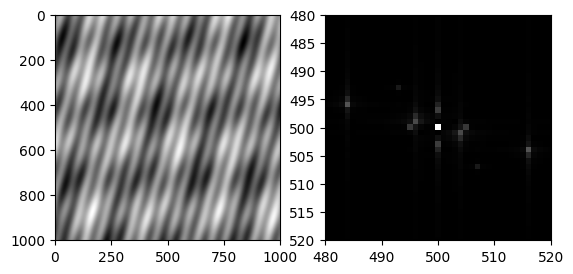

In [48]:
# gratings.py
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi/4, np.pi/9, np.pi/2, np.pi/12

gratings = np.full(shape=X.shape, fill_value=1.25)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len)
    
# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(121)
plt.imshow(gratings, cmap="gray")

plt.subplot(122)
plt.imshow(abs(ft), cmap="gray")

plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

Calculating The 2D Fourier Transform of An Image in Python

(301, 301)


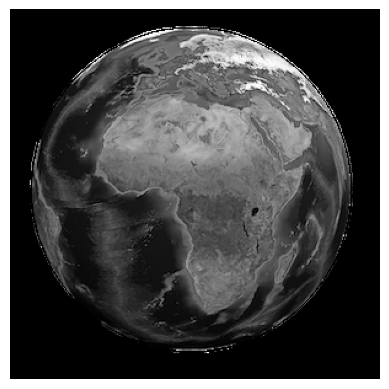

In [49]:
image_filename = "..\\images\\Earth.png"
# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
print(image.shape)
plt.set_cmap("gray")
plt.imshow(image)
plt.axis("off")
plt.show()

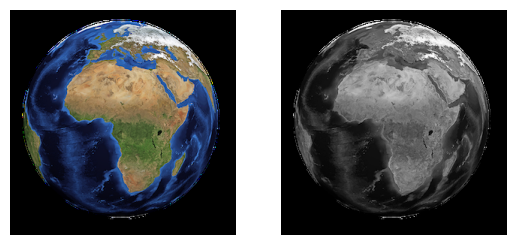

In [52]:
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

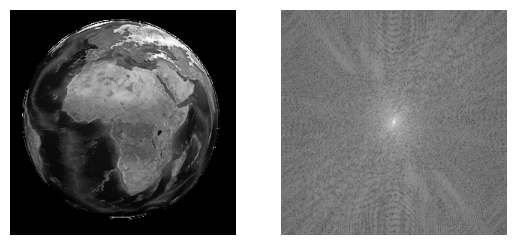

In [53]:
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
ft = calculate_2dft(gray)
plt.subplot(121)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)), cmap="gray")
plt.axis("off")
plt.show()

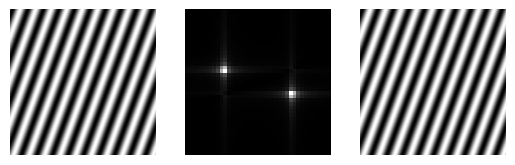

In [76]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9

grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.subplot(131)
plt.imshow(grating, cmap="gray")
plt.axis("off")

# Calculate the Fourier transform of the grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(132)
plt.imshow(abs(ft), cmap="gray")
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])
# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part
plt.subplot(133)
plt.imshow(ift, cmap="gray")
plt.axis("off")
plt.show()

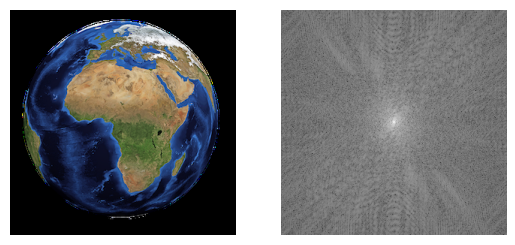

In [131]:
# fourier_synthesis.py
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

# Array dimensions (array is square) and centre pixel
array_size = len(gray)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))

ft = calculate_2dft(gray)

plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)), cmap="gray")
plt.axis("off")
plt.show()

In [78]:
# fourier_synthesis.py
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(len(image))

301


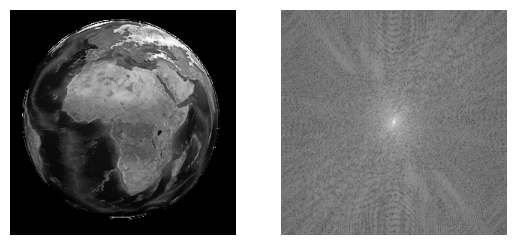

In [81]:
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

array_size = len(image)
centre = int((array_size - 1) / 2)
# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)
# Sort points based on distance from centre in ascending order
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

ft = calculate_2dft(gray)
plt.subplot(121)
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(abs(ft)), cmap="gray")
plt.axis("off")
plt.show()

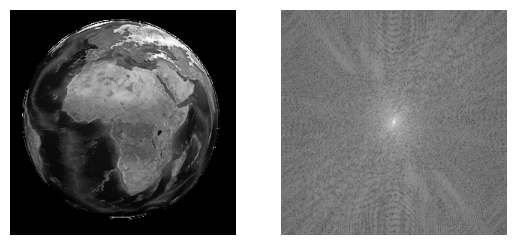

ValueError: operands could not be broadcast together with shapes (301,301) (301,301,3) (301,301) 

<Figure size 640x480 with 0 Axes>

In [190]:
image_filename = "..\\images\\Earth.png"
# Read and process image
image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt((coords[0] - centre) ** 2 + (coords[1] - centre) ** 2)

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]), centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating, cmap="gray")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction, cmap="gray")
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))

# Sort points based on distance from centre
coords_left_half = sorted(coords_left_half, key=lambda x: calculate_distance_from_centre(x, centre))


ft = calculate_2dft(gray)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(np.log(abs(ft)), cmap="gray")
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()

# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(gray.shape)
individual_grating = np.zeros(image.shape, dtype="complex")
idx = 0
# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(coords, centre)

        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        display_plots(rec_grating, rec_image, idx)

plt.show()

In [ ]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "..\\images\\Earth.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)
    plt.clf()

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = calculate_2dft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0
# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        display_plots(rec_grating, rec_image, idx)

plt.show()

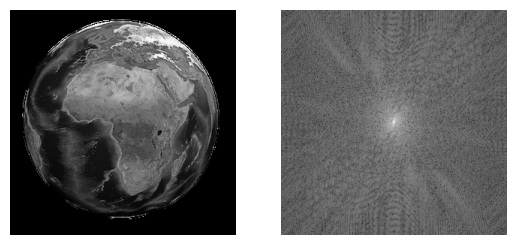

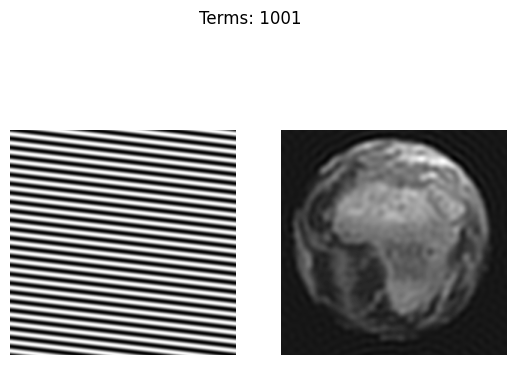

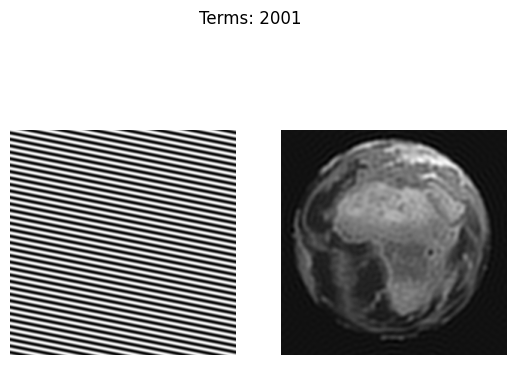

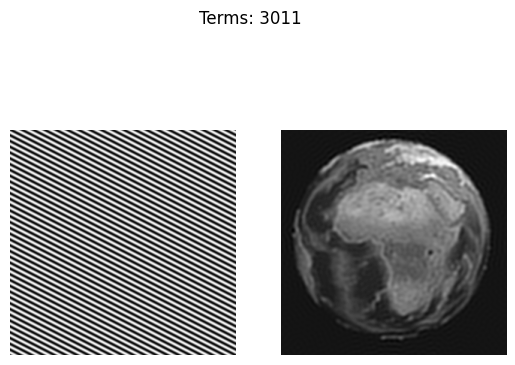

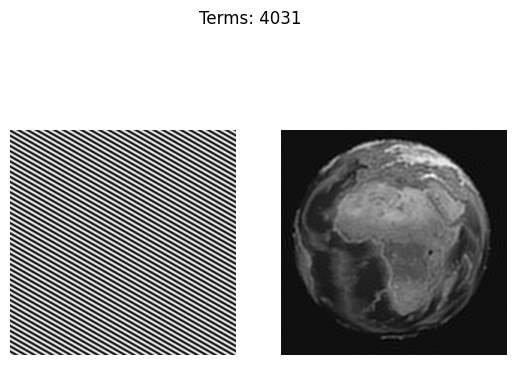

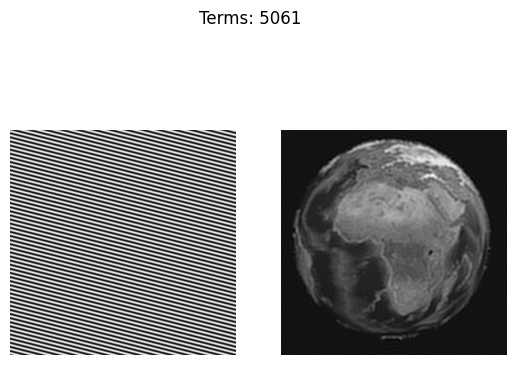

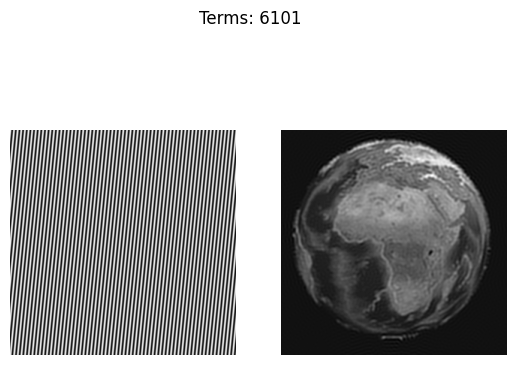

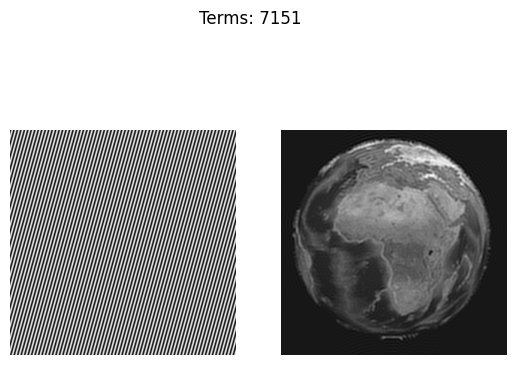

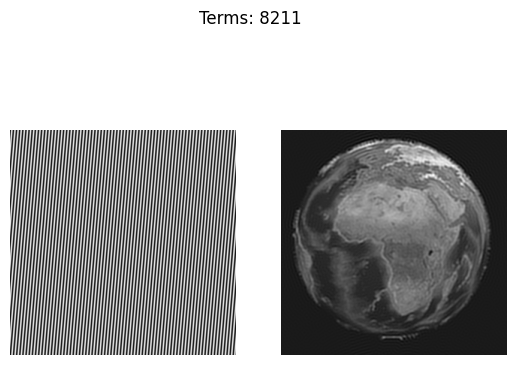

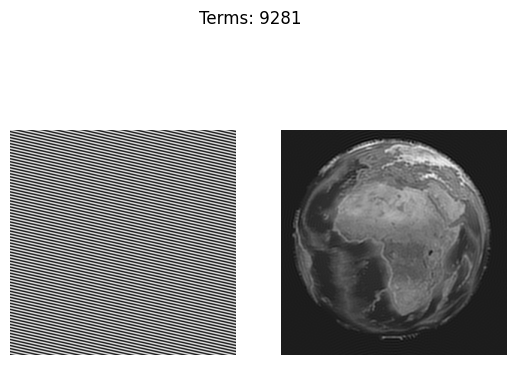

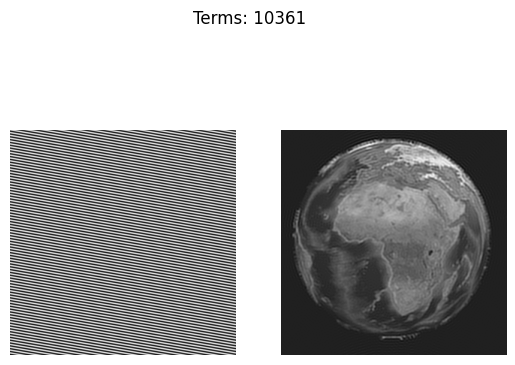

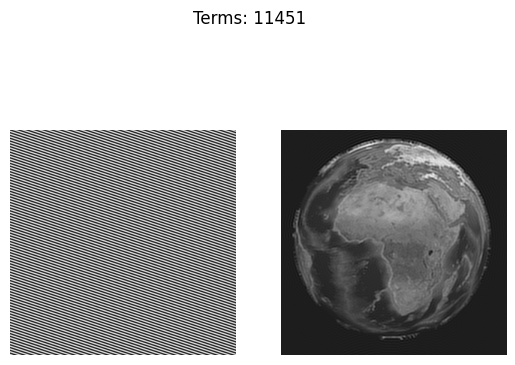

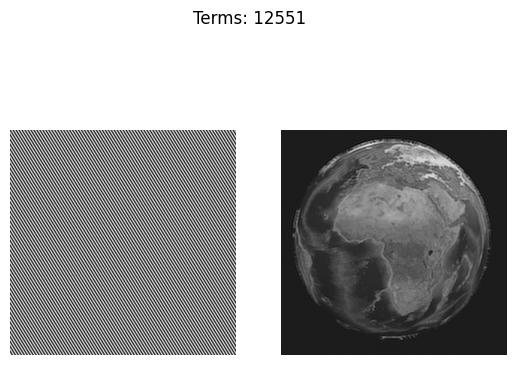

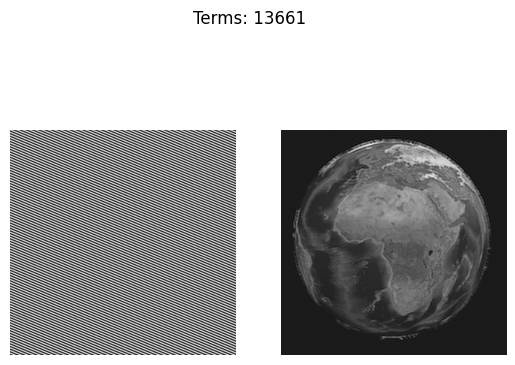

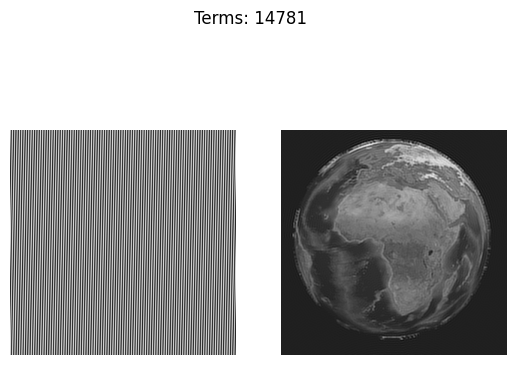

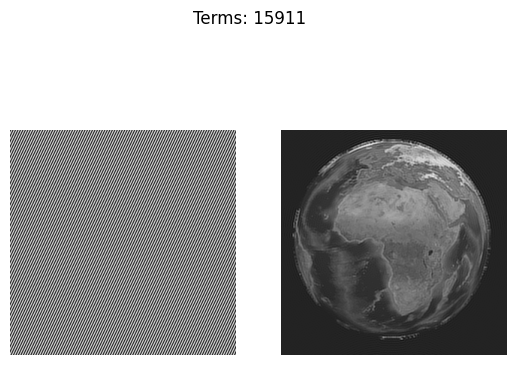

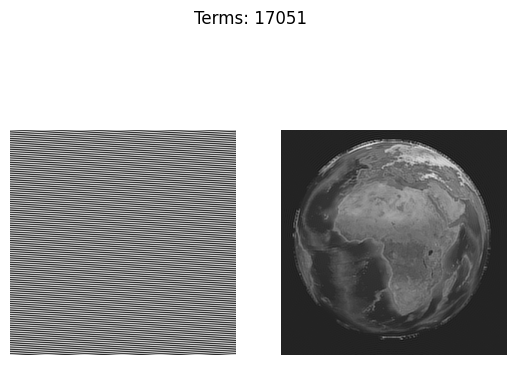

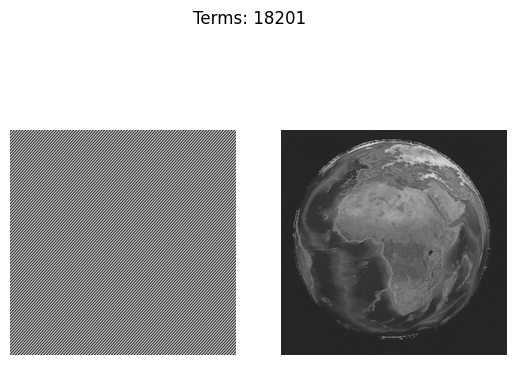

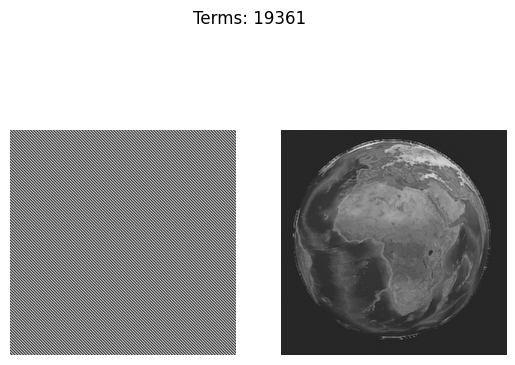

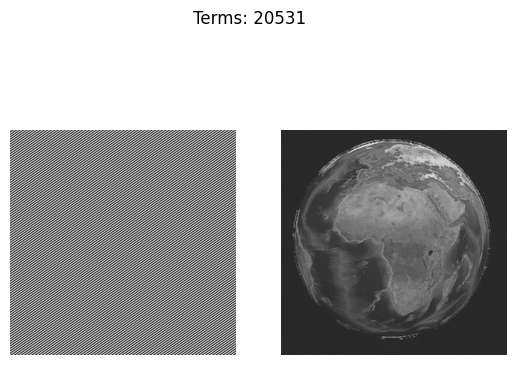

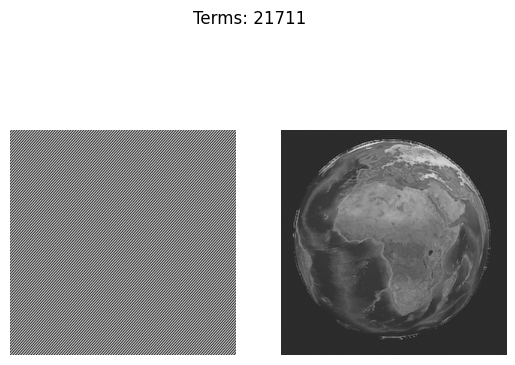

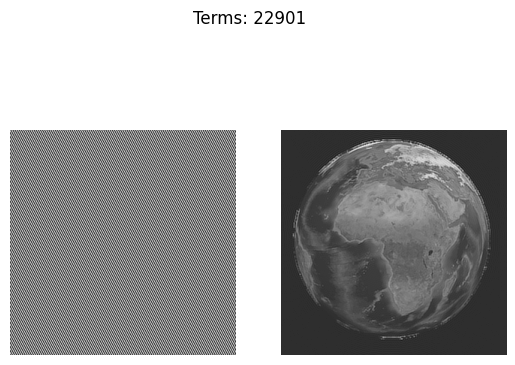

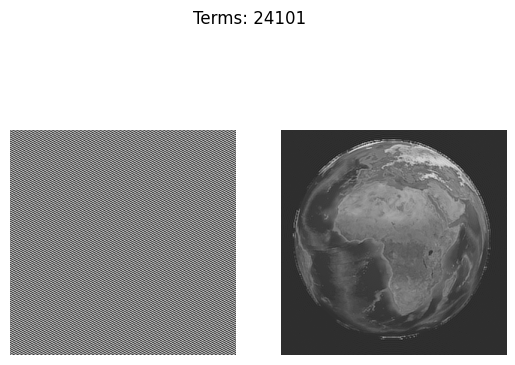

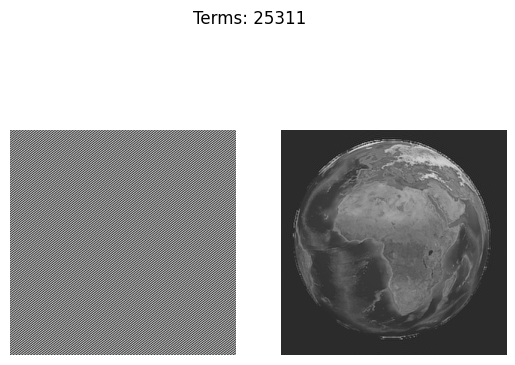

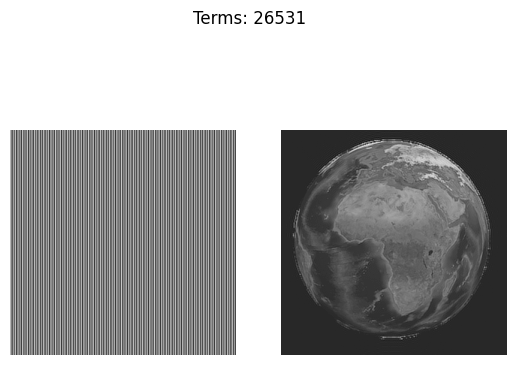

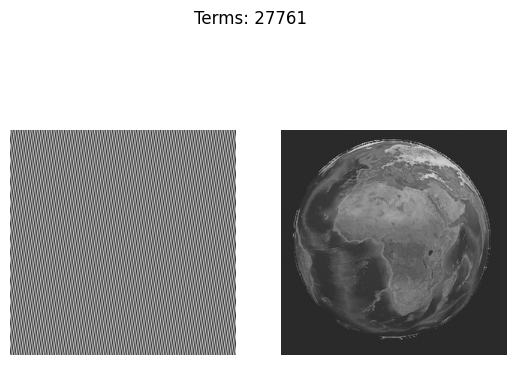

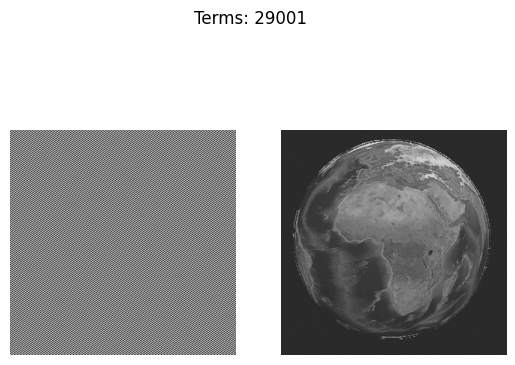

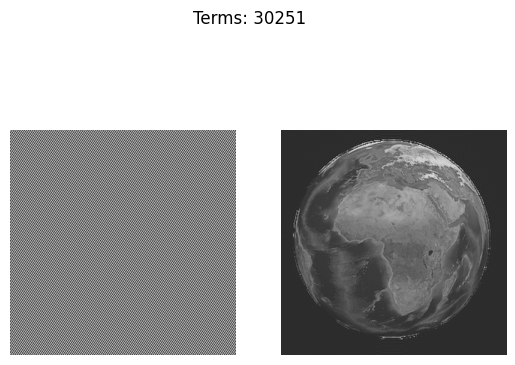

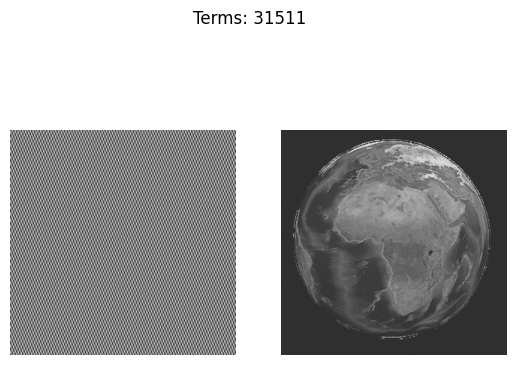

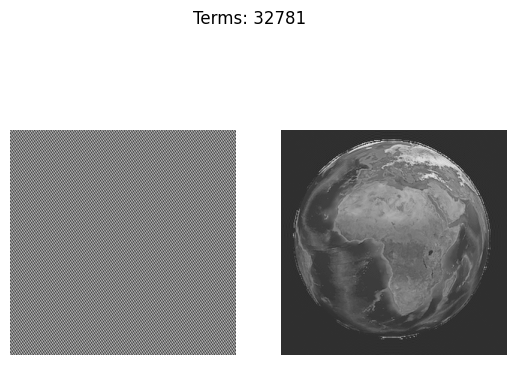

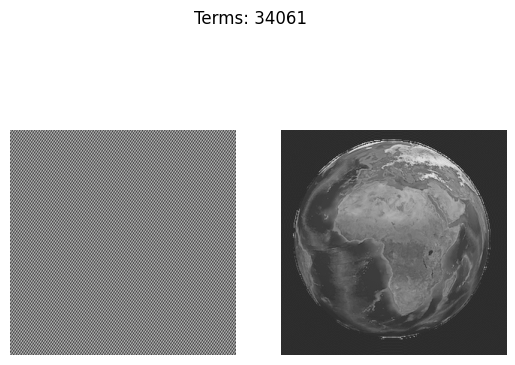

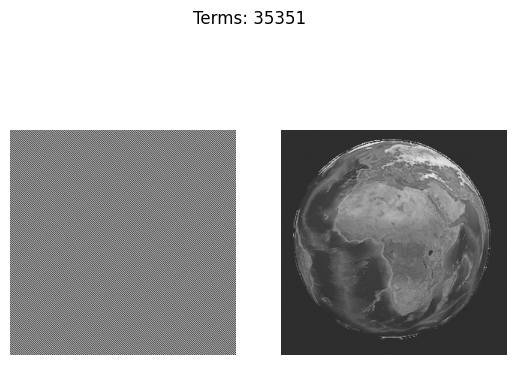

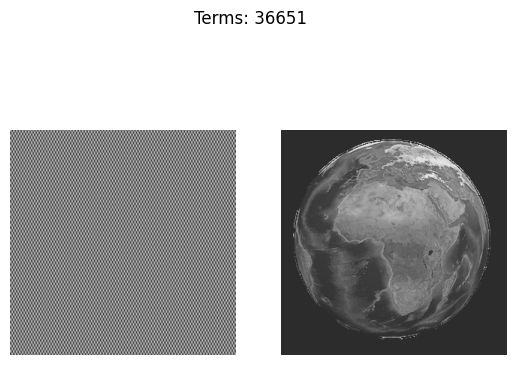

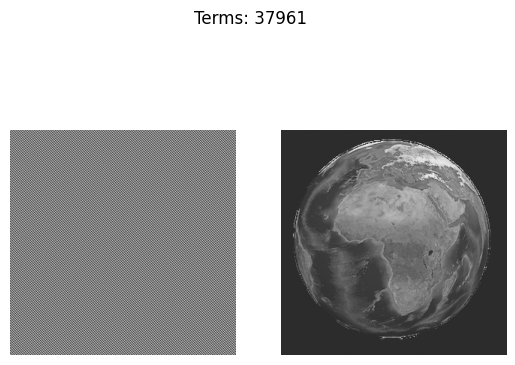

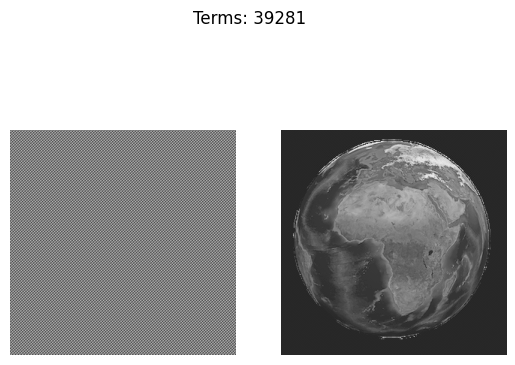

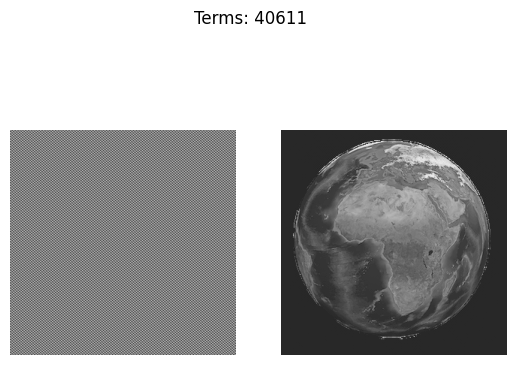

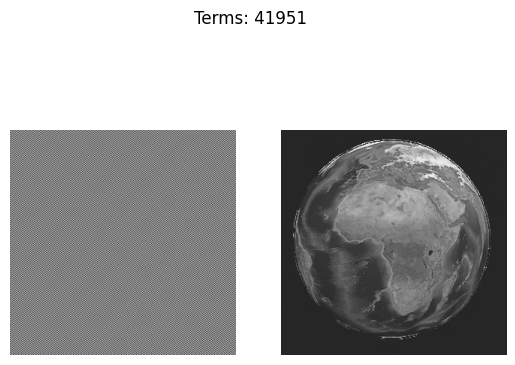

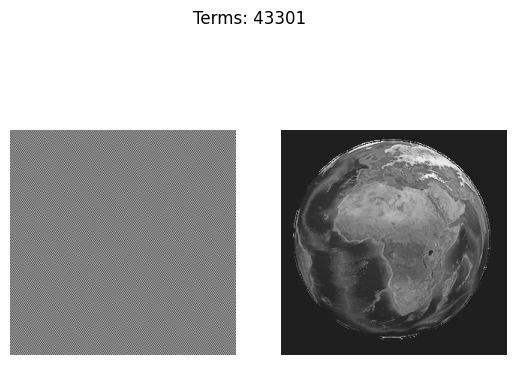

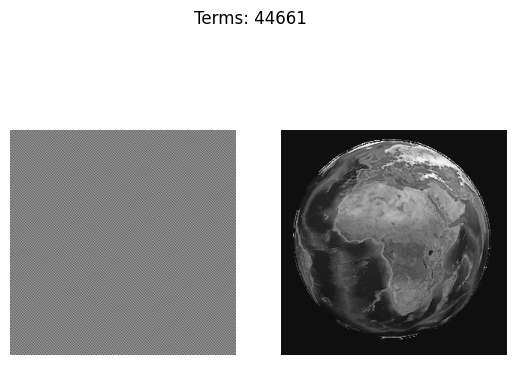

In [196]:

image_filename = "..\\images\\Earth.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis("off")
    plt.suptitle(f"Terms: {idx}")
    plt.pause(0.01)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = len(image)
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)

# Sort points based on distance from centre
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")

ft = calculate_2dft(image)

# Show grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.pause(2)

# Reconstruct image
fig = plt.figure()
# Step 1
# Set up empty arrays for final image and
# individual gratings
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0

# All steps are displayed until display_all_until value
display_all_until = 1
# After this, skip which steps to display using the
# display_step value
display_step = 1000
# Work out index of next step to display
next_display = display_all_until + display_step

# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        # Step 4
        # Calculate inverse Fourier transform to give the
        # reconstructed grating. Add this reconstructed
        # grating to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        # Clear individual_grating array, ready for
        # next iteration
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        # Don't display every step
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                # Accelerate animation the further the
                # iteration runs by increasing
                # display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)

plt.show()